<a href="https://colab.research.google.com/github/confettimimy/kt-m1-edu/blob/main/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,376 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv
[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']
(9, 2) (3, 2)
['수박' '참외' '참외' '참외' '수박' '수박' '수박' '수박' '참외']
1.0
1.0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(

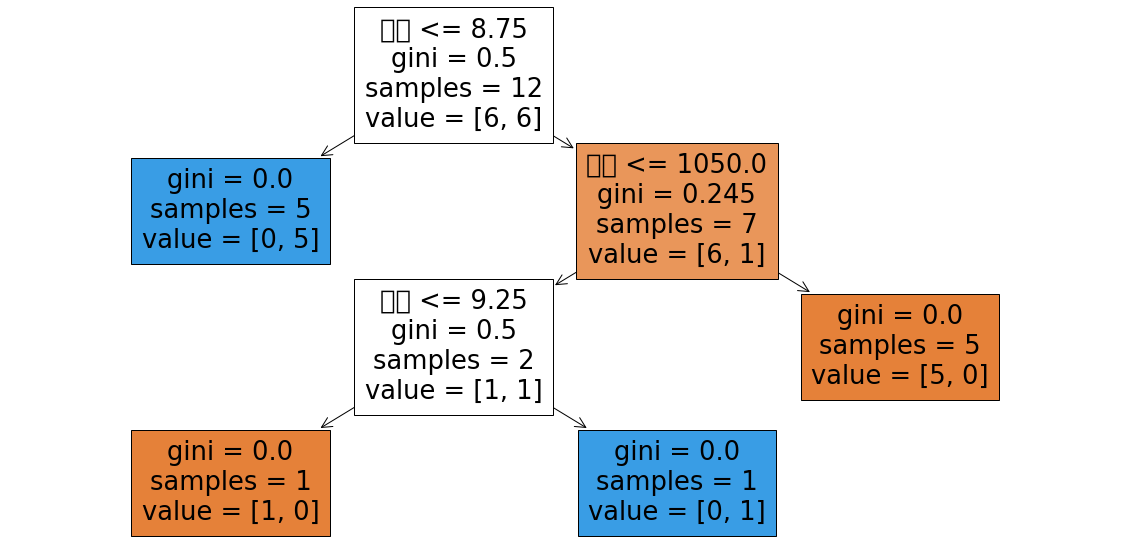

In [1]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


# 이제 상단의 런타임 -> 런타임 다시시작 해주세요

#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']),
                       encoding='cp949')
src_data

#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다

data = src_data[ ['무게','길이']].to_numpy()
target = src_data['종류'].to_numpy()
print(data)
print(target)

from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , test_size=0.2 , random_state=10)

print(훈련용_data.shape , 테스트용_data.shape)

print(훈련용_target)

#Step 4. 데이터 표준화를 진행합니다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(훈련용_data, 훈련용_target)
표준화_훈련데이터 = ss.transform(훈련용_data)
표준화_테스트데이터 = ss.transform(테스트용_data)

# 훈련 데이터와 테스트데이터로 모델 검증합니다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=50)
dt.fit(표준화_훈련데이터 , 훈련용_target)
print(dt.score(표준화_훈련데이터 , 훈련용_target))
print(dt.score(표준화_테스트데이터 , 테스트용_target))

#Step 5. 학습한 모델에 데이터를 입력해 테스트합니다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
찾는종류 = dt.fit(data ,target)
# '무게','길이
찾는종류.predict([[1500,15]])

#Step 6. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.tree import plot_tree
plt.figure( figsize=(20,10))
plot_tree(dt, max_depth=5 , filled=True ,
          feature_names=['무게','길이'] )

plt.show()